In [34]:
import numpy as np
from matplotlib import pyplot as plt

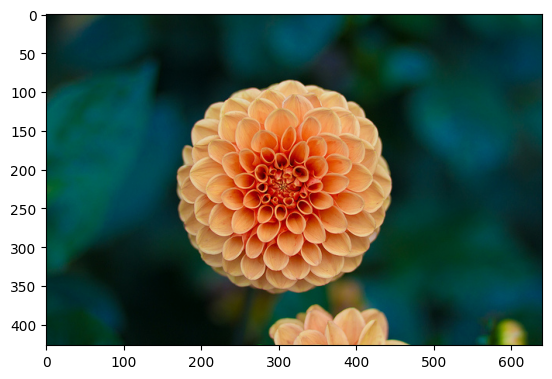

In [35]:
img = "assets/flower.jpg"
im = plt.imread(img)

plt.imshow(im)

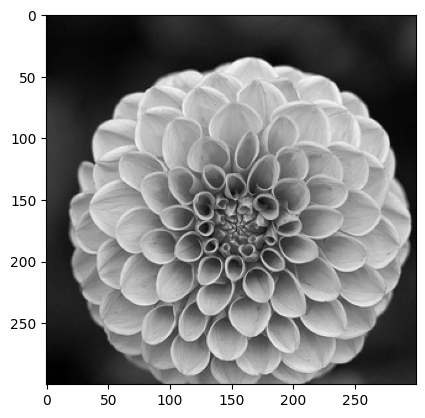

In [36]:
im.shape # RGB to niveaux de gris 
im = np.sum(im, axis=2)
# im = im[:500,:500]
im = im[50:350,150:450]
plt.imshow(im, cmap="gray")

In [37]:
im = im - np.min(im)
im = im / np.max(im)
im = im - np.mean(im)
im

array([[-0.40284731, -0.40284731, -0.39667447, ..., -0.28247694,
        -0.27939052, -0.27013126],
       [-0.40747694, -0.40747694, -0.39513126, ..., -0.27939052,
        -0.2763041 , -0.26550163],
       [-0.40593373, -0.40284731, -0.39050163, ..., -0.26858805,
        -0.26395842, -0.25932879],
       ...,
       [-0.42908188, -0.43371151, -0.43371151, ..., -0.26241521,
        -0.26395842, -0.26395842],
       [-0.43371151, -0.43371151, -0.43371151, ..., -0.26241521,
        -0.260872  , -0.26395842],
       [-0.43371151, -0.43371151, -0.43371151, ..., -0.25624237,
        -0.25624237, -0.260872  ]])

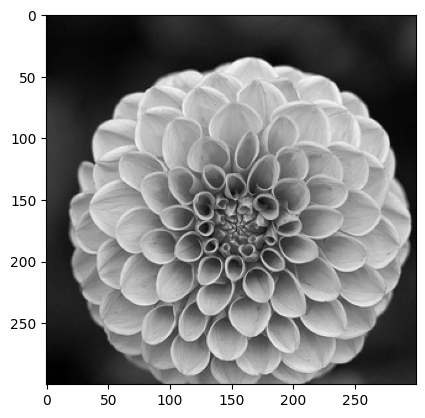

In [38]:

plt.imshow(im, cmap="gray")

In [39]:
from numpy.linalg import svd

U, S, Vh = np.linalg.svd(im, full_matrices=True)

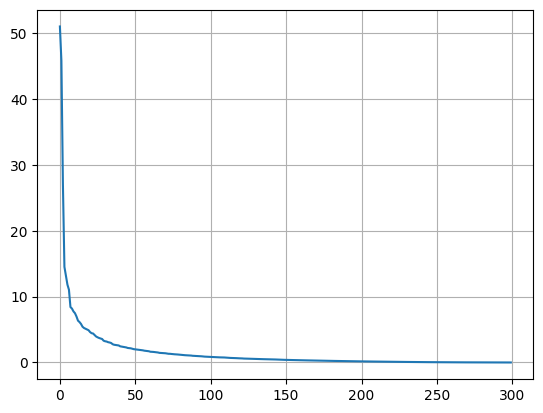

In [40]:
plt.plot(S)
plt.grid()

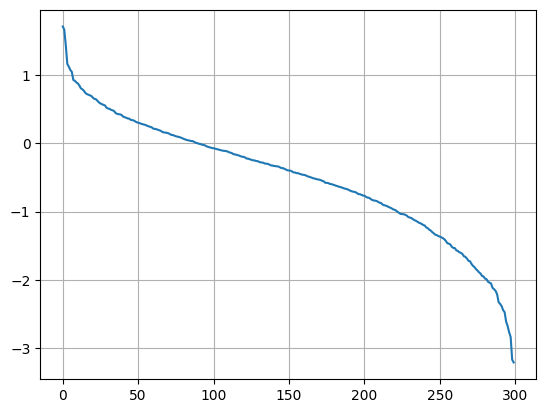

In [41]:
plt.plot(np.log10(S))
plt.grid()

In [42]:
def recons(U, S, Vh, seuil):
    S = np.diag(S[:seuil])
    U = U[:,:seuil]
    Vh = Vh[:seuil, :]
    res = np.dot(U,np.dot(S,Vh))
    
    return res 


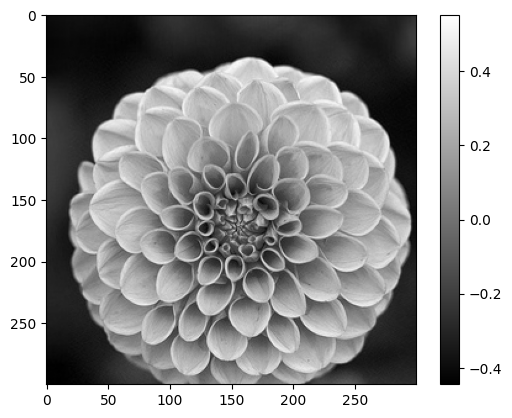

In [43]:

seuil = 150
im2 = recons(U, S, Vh, seuil)
plt.imshow(im-im2, cmap="gray")
plt.imshow(im2, cmap="gray")
plt.colorbar()

In [44]:
print(np.prod(im2.shape)) 
print(seuil + 2*seuil*im2.shape[0])

90000
90150
